## 1. Defining the Question

### a) Specifying the Question

1. Use polynomial regression to build model that predict:
 *   how many goals the home team scores.
 *   how many goals the away team scores.
2. Use logistic regression to build a model that predicts scores using team status(win, draw or lose).






### b) Defining the Metric for Success

Having models that are highly accurate, with minimal errors for reliable score 
predictions. The models should have low multicolinearity between independent variables. There should aslo, be low rmse and standard error.





### c) Recording the Experimental Design



1.   Importing necessary libraries.
2.   Load and read the datasets
3.   Tidy up the data.
4.   Exploratory Analysis.
5.   Implementing the solutions using polynomial and logistic regression.
6.   Challenging the solutions.



### d) Data Relevance

The data being analysed is relevant and credible.

## 2. Reading the Data

In [1072]:
# Import libraries
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import scipy as sp
from sklearn import metrics



In [1073]:
# Loading the datasets
# 
ranking = pd.read_csv('fifa_ranking.csv')
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [1074]:
# Results dataset
#
results = pd.read_csv('results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## 3. Checking the Data

Checking the results dataset


In [1075]:
# Determining the number of records and data types
# 
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [1076]:
# Previewing the top of our datasets
#
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [1077]:
# Previewing the bottom of our dataset
#
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [1078]:
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


Checking the ranking dataset.

In [1079]:
# Determining the number of records and data types
# 
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [1080]:
# Previewing the top of our datasets
#
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [1081]:
# Previewing the bottom of our dataset
#
ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [1082]:
ranking.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


## 4. External Data Source Validation

### a.Validation

The data source is valid.

## 5. Tidying the Dataset

In [1083]:
# Check for missing values for both datasets
#
rank_null = ranking.isnull().sum()
print(rank_null)

print('**************')

results_null = results.isnull().sum()
print(results_null)

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64
**************
date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64


In [1084]:
# checking for duplicates for both datasets
#
rank_dupl = ranking.duplicated().sum()
print(rank_dupl)

print('***************')

results_dupl = results.duplicated().sum()
print(results_dupl)

37
***************
0


In [1085]:
# Drop the 37 duplicates on the ranking dataset
#
ranking.drop_duplicates(subset = None, keep = 'first', inplace = True)

In [1086]:
# drop unwanted columns from the ranking dataset
#
ranking1 = ranking.drop(columns=['country_abrv', 'total_points', 'previous_points',
           'rank_change', 'cur_year_avg', 'cur_year_avg_weighted','last_year_avg',
           'last_year_avg_weighted', 'two_year_ago_avg','two_year_ago_weighted',
           'three_year_ago_avg', 'three_year_ago_weighted'])
ranking1.head()

,rank,country_full,confederation,rank_date
0,1,Germany,UEFA,1993-08-08
1,2,Italy,UEFA,1993-08-08
2,3,Switzerland,UEFA,1993-08-08
3,4,Sweden,UEFA,1993-08-08
4,5,Argentina,CONMEBOL,1993-08-08


The Fifa ranking dataset has records from 1993, unlike the results dataset whose records date earlier. A merger based especially on date is required.

In [1087]:
# Merge columns from ranking with results datasets
#
merge = pd.merge(results, ranking1, how='inner', left_on=['home_team', 'date'],
                 right_on=['country_full', 'rank_date'])
merge.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59,Bolivia,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,Brazil,CONMEBOL,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,35,Ecuador,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,65,Guinea,CAF,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,67,Paraguay,CONMEBOL,1993-08-08


In [1088]:
merge1 = pd.merge(results, ranking1, how='inner', left_on=['away_team', 'date'],
                 right_on=['country_full', 'rank_date'])
merge1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,22,Uruguay,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,14,Mexico,CONCACAF,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,94,Venezuela,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,86,Sierra Leone,CAF,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,5,Argentina,CONMEBOL,1993-08-08


In [1089]:
merge3 = pd.merge(merge, merge1, how='inner', left_on=['date', 'home_team', 'away_team',
         'home_score', 'away_score', 'tournament'], right_on=['date', 'home_team',
         'away_team', 'home_score', 'away_score', 'tournament'])
merge3.head()

,date,home_team,away_team,home_score,away_score,tournament,city_x,country_x,neutral_x,rank_x,country_full_x,confederation_x,rank_date_x,city_y,country_y,neutral_y,rank_y,country_full_y,confederation_y,rank_date_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59,Bolivia,CONMEBOL,1993-08-08,La Paz,Bolivia,False,22,Uruguay,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,Brazil,CONMEBOL,1993-08-08,Maceió,Brazil,False,14,Mexico,CONCACAF,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,35,Ecuador,CONMEBOL,1993-08-08,Quito,Ecuador,False,94,Venezuela,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,65,Guinea,CAF,1993-08-08,Conakry,Guinea,False,86,Sierra Leone,CAF,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,67,Paraguay,CONMEBOL,1993-08-08,Asunción,Paraguay,False,5,Argentina,CONMEBOL,1993-08-08


In [1090]:
merge3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 870
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             871 non-null    object
 1   home_team        871 non-null    object
 2   away_team        871 non-null    object
 3   home_score       871 non-null    int64 
 4   away_score       871 non-null    int64 
 5   tournament       871 non-null    object
 6   city_x           871 non-null    object
 7   country_x        871 non-null    object
 8   neutral_x        871 non-null    bool  
 9   rank_x           871 non-null    int64 
 10  country_full_x   871 non-null    object
 11  confederation_x  871 non-null    object
 12  rank_date_x      871 non-null    object
 13  city_y           871 non-null    object
 14  country_y        871 non-null    object
 15  neutral_y        871 non-null    bool  
 16  rank_y           871 non-null    int64 
 17  country_full_y   871 non-null    ob

In [1091]:
# drop redundant columns
#
dropped = merge3.drop(columns=['date', 'rank_date_x', 'neutral_y', 'country_full_y',
          'confederation_x', 'country_full_x','rank_date_y', 'city_y', 'country_y',
          'city_x', 'country_x', 'confederation_y'])
dropped.head()

,home_team,away_team,home_score,away_score,tournament,neutral_x,rank_x,rank_y
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,59,22
1,Brazil,Mexico,1,1,Friendly,False,8,14
2,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False,35,94
3,Guinea,Sierra Leone,1,0,Friendly,False,65,86
4,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,67,5


In [1092]:
# Rename columns
#
dropped1 = dropped.rename(columns = {'neutral_x':'neutral', 'rank_x':'home_rank',
        'rank_y':'away_rank'})
dropped1.head()

,home_team,away_team,home_score,away_score,tournament,neutral,home_rank,away_rank
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,59,22
1,Brazil,Mexico,1,1,Friendly,False,8,14
2,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False,35,94
3,Guinea,Sierra Leone,1,0,Friendly,False,65,86
4,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,67,5


In [1093]:
# Change values in the tournament column to friendly, fifa and other
#

def my_function(x):
  if x == 'Friendly':
    return 'Friendly'
  elif x == 'FIFA World Cup qualification':
    return 'World Cup'
  else:
    return 'Others'

dropped1['tourn'] = dropped1.tournament.apply(lambda x: my_function(x))
dropped1.head()


,home_team,away_team,home_score,away_score,tournament,neutral,home_rank,away_rank,tourn
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,59,22,World Cup
1,Brazil,Mexico,1,1,Friendly,False,8,14,Friendly
2,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False,35,94,World Cup
3,Guinea,Sierra Leone,1,0,Friendly,False,65,86,Friendly
4,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,67,5,World Cup


In [1094]:
# drop tournament column and rename tourn column
#
dropped2 = dropped1.drop(columns = 'tournament')

In [1095]:
# rename
#
score = dropped2.rename(columns = {'tourn':'tournament'})
score.head()

,home_team,away_team,home_score,away_score,neutral,home_rank,away_rank,tournament
0,Bolivia,Uruguay,3,1,False,59,22,World Cup
1,Brazil,Mexico,1,1,False,8,14,Friendly
2,Ecuador,Venezuela,5,0,False,35,94,World Cup
3,Guinea,Sierra Leone,1,0,False,65,86,Friendly
4,Paraguay,Argentina,1,3,False,67,5,World Cup


In [1096]:
# Create new column status that shows whether
# a game was won, lost or drawn
#

def my_function(x):
 
  if x['home_score'] < x['away_score']:
    status = 'Lose'
  elif x['home_score'] > x['away_score']:
    status = 'Win'
  else:
    status = 'Draw'
  return status

score['status'] = score.apply(my_function, axis=1)
score.head()



,home_team,away_team,home_score,away_score,neutral,home_rank,away_rank,tournament,status
0,Bolivia,Uruguay,3,1,False,59,22,World Cup,Win
1,Brazil,Mexico,1,1,False,8,14,Friendly,Draw
2,Ecuador,Venezuela,5,0,False,35,94,World Cup,Win
3,Guinea,Sierra Leone,1,0,False,65,86,Friendly,Win
4,Paraguay,Argentina,1,3,False,67,5,World Cup,Lose


Any outliers present will not be removed, since it may reduce the accuracy of the prediction models.

## 6. Exploratory Analysis

### Univariate Analysis.

In [1097]:
# Frequency for categorical columns
#
print(score.home_team.value_counts())
print('*******************************')
print(score.away_team.value_counts())
print('*******************************')
print(score.tournament.value_counts())
print('*******************************')
print(score.neutral.value_counts())
print('*******************************')
print(score.status.value_counts())

Mexico          23
Estonia         15
Saudi Arabia    15
Portugal        15
Greece          14
                ..
Haiti            1
Canada           1
Indonesia        1
Palestine        1
Grenada          1
Name: home_team, Length: 160, dtype: int64
*******************************
Uruguay                     15
Argentina                   15
Kuwait                      14
Israel                      13
Bulgaria                    13
                            ..
Eritrea                      1
Tajikistan                   1
Turks and Caicos Islands     1
Sierra Leone                 1
Mongolia                     1
Name: away_team, Length: 159, dtype: int64
*******************************
Friendly     574
Others       163
World Cup    134
Name: tournament, dtype: int64
*******************************
False    733
True     138
Name: neutral, dtype: int64
*******************************
Win     420
Draw    226
Lose    225
Name: status, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


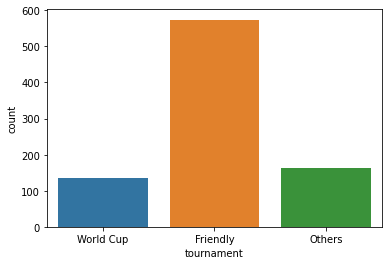

In [1098]:
# Visualisation of categorical columns
# tournaments
#
sb.countplot(score['tournament'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


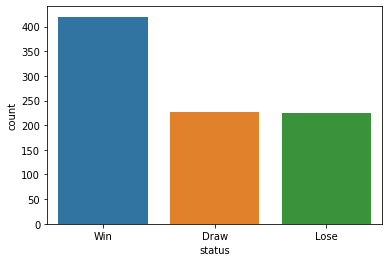

In [1099]:
# status
#
sb.countplot(score['status'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


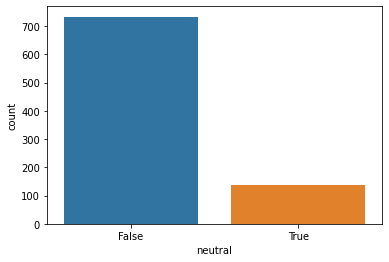

In [1100]:
# neutral
#
sb.countplot(score['neutral'])

In [1101]:
# Measures of spread for numerical data
#
print(score['home_score'].std())
print(score['home_score'].skew())
print(score['home_score'].kurt())
print('**************************')
print(score['away_score'].std())
print(score['away_score'].skew())
print(score['away_score'].kurt())
print('**************************')
print(score['home_rank'].std())
print(score['home_rank'].skew())
print(score['home_rank'].kurt())
print('**************************')
print(score['away_rank'].std())
print(score['away_rank'].skew())
print(score['away_rank'].kurt())

1.9059597949971168
5.524378027487252
68.55786471188763
**************************
1.1546913954590308
1.74656856137909
5.240328362114057
**************************
47.55799336342231
0.7530868154235779
-0.1488295399350119
**************************
50.497652300038304
0.6669445275319614
-0.36177849504210124


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

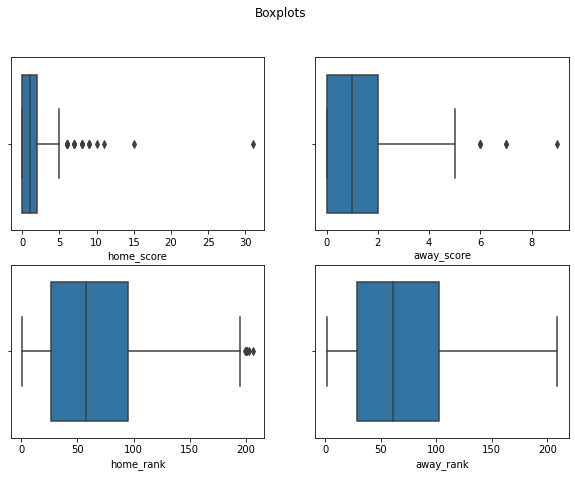

In [1102]:
# visualisation of numerical variables
#
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sb.boxplot(score['home_score'], ax=ax1)
sb.boxplot(score['away_score'], ax=ax2)
sb.boxplot(score['home_rank'], ax=ax3)
sb.boxplot(score['away_rank'], ax=ax4)
plt.show()

### Bivariate Analysis.

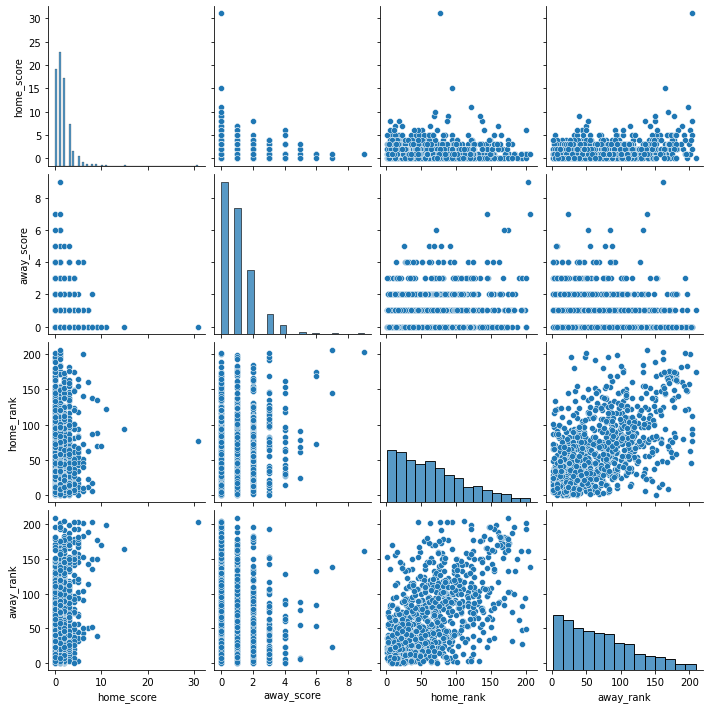

In [1144]:
# scatter map for all numeric values
#
numerical = score[['home_score', 'away_score', 'home_rank', 'away_rank']]
sb.pairplot(numerical)
plt.show()

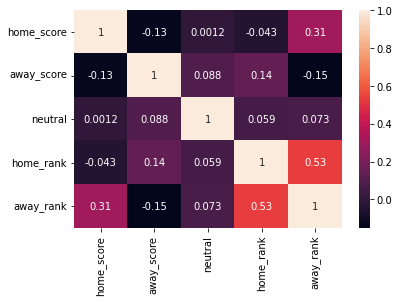

In [1104]:
# corelation heatmap
#
sb.heatmap(score.corr(),annot=True)
plt.show()

## 7. Implementing the Solution

### Polynomial Regression

Model 1: Predicting Away Scores.

In [1105]:
# finding out the number of values in each categorical column
#
print(score['home_team'].unique())
print('*************************')
print(score['away_team'].unique())
print('*************************')
print(score['tournament'].unique())
print('*************************')
print(score['neutral'].unique())
print('*************************')
print(score['status'].unique())

['Bolivia' 'Brazil' 'Ecuador' 'Guinea' 'Paraguay' 'Peru' 'Saudi Arabia'
 'Israel' 'England' 'Poland' 'Oman' 'Iraq' 'Fiji' 'Angola' 'Burkina Faso'
 'Greece' 'Sierra Leone' 'South Africa' 'France' 'Portugal' 'Argentina'
 'Belgium' 'Colombia' 'Czech Republic' 'Denmark' 'Estonia' 'Hungary'
 'Jamaica' 'Netherlands' 'Northern Ireland' 'Norway' 'Romania' 'Slovakia'
 'Switzerland' 'Venezuela' 'Honduras' 'Russia' 'El Salvador' 'Syria'
 'Mexico' 'Malta' 'New Zealand' 'Belarus' 'Bosnia and Herzegovina'
 'Bulgaria' 'Finland' 'Republic of Ireland' 'Liechtenstein' 'Turkey'
 'Ukraine' 'Uruguay' 'Kuwait' 'Senegal' 'Spain' 'Chile' 'Croatia'
 'Germany' 'Italy' 'Scotland' 'Slovenia' 'Sweden' 'Austria' 'Cyprus'
 'Iceland' 'Lithuania' 'Qatar' 'United Arab Emirates' 'Sudan' 'Albania'
 'Egypt' 'Georgia' 'Guatemala' 'Luxembourg' 'San Marino' 'Costa Rica'
 'Thailand' 'Faroe Islands' 'Uzbekistan' 'Tunisia' 'Panama' 'Togo' 'Macau'
 'Japan' 'Jordan' 'Maldives' 'Azerbaijan' 'Canada' 'Trinidad and Tobago'
 'China P

In [1106]:
# Encoding columns with categorical variables
#
categorical_feature_mask = score.dtypes==object
categorical_cols = score.columns[categorical_feature_mask].tolist()

le = LabelEncoder()
score[categorical_cols] = score[categorical_cols].apply(lambda col: le.fit_transform(col))
score[categorical_cols].head()

,home_team,away_team,tournament,status
0,20,150,2,2
1,23,90,0,0
2,40,153,2,2
3,59,125,0,2
4,111,7,2,1


In [1107]:
#for neutral

In [1108]:
# checking for multicollinearity
#
independent_only = score.drop(columns=['neutral', 'status', 'away_score'])
correlations = independent_only.corr()

correlations

,home_team,away_team,home_score,home_rank,away_rank,tournament
home_team,1.000000,0.029351,-0.015449,0.008096,0.069756,0.001418
away_team,0.029351,1.000000,-0.074795,0.028516,-0.011164,0.044425
home_score,-0.015449,-0.074795,1.000000,-0.043381,0.309322,0.174615
home_rank,0.008096,0.028516,-0.043381,1.000000,0.534618,0.216232
away_rank,0.069756,-0.011164,0.309322,0.534618,1.000000,0.302989
tournament,0.001418,0.044425,0.174615,0.216232,0.302989,1.000000


VIF will be computed using the above correlation values so as to detect multicolinearity.

In [1109]:
# computing VIF
#
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,home_team,away_team,home_score,home_rank,away_rank,tournament
home_team,1.009627,-0.029501,0.050613,0.056308,-0.121243,0.015601
away_team,-0.029501,1.010243,0.078620,-0.022488,0.019062,-0.059480
home_score,0.050613,0.078620,1.209445,0.361839,-0.530097,-0.132379
home_rank,0.056308,-0.022488,0.361839,1.518506,-0.891406,-0.120527
away_rank,-0.121243,0.019062,-0.530097,-0.891406,1.720947,-0.236790
tournament,0.015601,-0.059480,-0.132379,-0.120527,-0.236790,1.123542


All the VIF scores are below 4. this means there is no multicolinearity between the variables. Therefore no variable will be dropped

In [1110]:
# select dependent and independent columns
#
X = score.iloc[:, 5:7].values
y = score.iloc[:, 3].values


In [1111]:
# define the train and test data
#
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)


LinearRegression()

In [1112]:
# cross validate

folds = KFold(n_splits=5)

print('we are using ' +str(folds.get_n_splits(X)) + ' folds')


RMSES = [] 
count = 1 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.0409732823179902

Training model 2
Model 2 Root Mean Squared Error: 1.2387647111346682

Training model 3
Model 3 Root Mean Squared Error: 1.193087650585658

Training model 4
Model 4 Root Mean Squared Error: 0.9928876114919961

Training model 5
Model 5 Root Mean Squared Error: 1.0346199832354857


In [1113]:
# Test and compute rmse
#

y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



Mean Absolute Error: 0.7609121350010916
Mean Squared Error: 1.057612571322338
Root Mean Squared Error: 1.0284029226535376


In [1114]:
# computing residuals
#
residuals = np.subtract(y_pred, y_test)
pd.DataFrame(residuals).describe()

residuals.mean()

0.08823071253003142

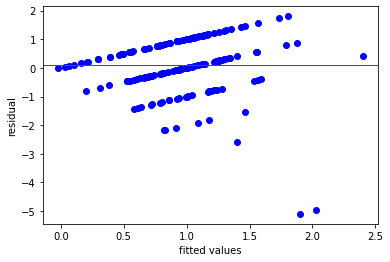

In [1115]:
# creating residual plots
#

plt.scatter(y_pred, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [1116]:
# bartlett's test
#
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)


if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


inf
the variances are homogeneous!


Model 2: Predicting Home Scores:

In [1117]:
X = score.iloc[:, 5:7].values
y = score.iloc[:, 2].values

In [1118]:
# define the train and test data
#
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [1119]:
# cross validate

folds = KFold(n_splits=5)

print('we are using ' +str(folds.get_n_splits(X)) + ' folds')


RMSES = [] 
count = 1 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.483678216738356

Training model 2
Model 2 Root Mean Squared Error: 2.467051299371172

Training model 3
Model 3 Root Mean Squared Error: 1.6493900717861083

Training model 4
Model 4 Root Mean Squared Error: 1.2567526433479554

Training model 5
Model 5 Root Mean Squared Error: 1.7306068090179305


In [1120]:
# Test and compute rmse
#

y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 1.2303334769438596
Mean Squared Error: 3.0521233712864158
Root Mean Squared Error: 1.7470327333185305


In [1121]:
# computing residuals
#
residuals = np.subtract(y_pred, y_test)
pd.DataFrame(residuals).describe()

residuals.mean()

0.22886322411575707

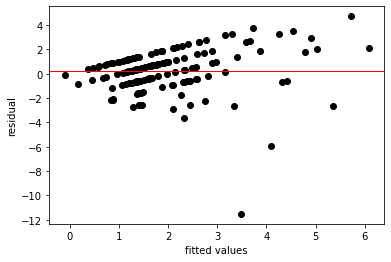

In [1122]:
# creating residual plots
#

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [1123]:
# bartlett's test
#
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)


if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

315.71791215299237
the variances are homogeneous!


### Logistic Regression

In [1133]:
# define dependent and independant variables
#
X = score[['status', 'home_rank', 'away_rank', 'tournament']]
y = score['home_score']


In [1134]:
# splitting and training our model
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [1135]:
# scaling our data
#
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [1136]:
# Fitting the model
#
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [1137]:
# Training and Cross Validation
# 
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

print(all_accuracies.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


0.3759788646524861


Accuracy of 37.5% is too low to make a prediction with.

## 8. Challenging the solution

Using hyperparameter tuning to improve the accuracy level:

In [1138]:
# Hyperparameter tuning with grid search
#
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [1139]:
# Instantiating GridSearchCV object
# 
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [1140]:
# Call the fit method
# 
gd_sr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=300, random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 300, 500, 800, 1000]},
             scoring='accuracy')

In [1141]:
# Check the parameters that return the highest accuracy
#
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 500}


In [1142]:
# Find the obtained accuracy
# 
best_result = gd_sr.best_score_
print(best_result)

0.37921690827801113


There is only a slight improvement in the accuracy level.Therefore, logistic regression is not suited to make a prediction model. Using other models is highly recommended.

## 9. Follow up questions

### a). Did we have the right data?

The data was insufficient. The variables present could not produce a prediction model with high accuracy.

### b). Do we need other data to answer our question?

Yes.

### c). Did we have the right question?

Yes, though the data present could not give predictions with the desired accuracy.